In [1]:
import pandas as pd
import numpy as np

# Load data
df = pd.read_csv('outliers_100x3_raw.csv')
print("First 5 rows:")
print(df.head())

First 5 rows:
   daily_orders  revenue_usd  delivery_time_min
0            52       830.16               47.1
1            49       949.52               48.4
2            53       958.87               51.5
3            58       903.73               51.3
4            49       980.65               36.7


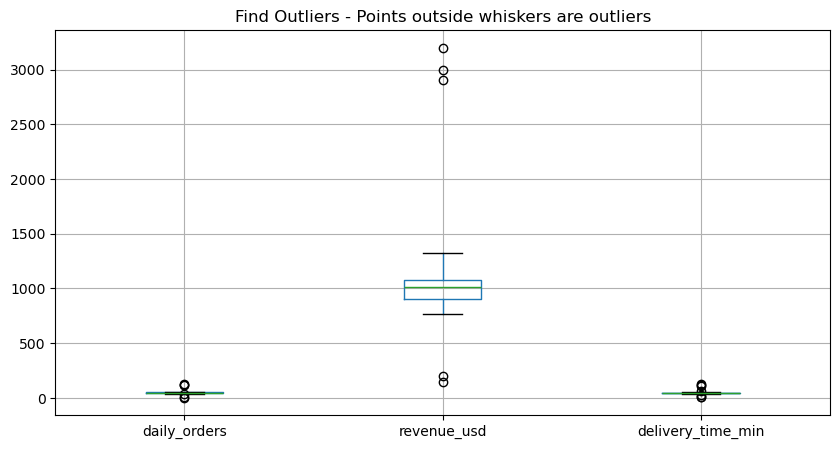

In [8]:
# Step 2: Simple Outlier Detection with Boxplots
import matplotlib.pyplot as plt

# Simple boxplots to see outliers
df.boxplot(figsize=(10, 5))
plt.title('Find Outliers - Points outside whiskers are outliers')
plt.show()

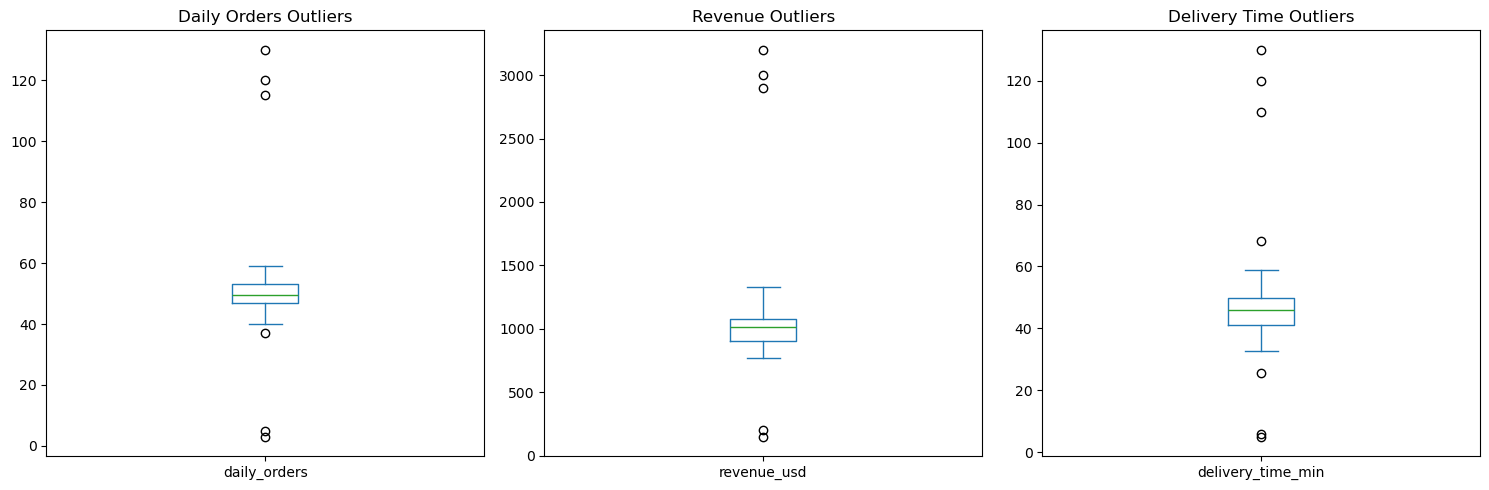

In [9]:
# option 2
import matplotlib.pyplot as plt

# Create separate boxplots - much clearer!
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)  # 1 row, 3 columns, 1st plot
df['daily_orders'].plot(kind='box')
plt.title('Daily Orders Outliers')

plt.subplot(1, 3, 2)  # 1 row, 3 columns, 2nd plot
df['revenue_usd'].plot(kind='box')
plt.title('Revenue Outliers')

plt.subplot(1, 3, 3)  # 1 row, 3 columns, 3rd plot
df['delivery_time_min'].plot(kind='box')
plt.title('Delivery Time Outliers')

plt.tight_layout()  # Prevents overlapping
plt.show()

In [10]:
# Step 3: Easy IQR Method
def find_outliers_simple(column):
    Q1 = column.quantile(0.25)  # 25th percentile
    Q3 = column.quantile(0.75)  # 75th percentile
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return lower, upper

print("OUTLIER BOUNDARIES:")
for col in df.columns:
    lower, upper = find_outliers_simple(df[col])
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    print(f"{col}: {len(outliers)} outliers")

OUTLIER BOUNDARIES:
daily_orders: 6 outliers
revenue_usd: 5 outliers
delivery_time_min: 7 outliers


In [11]:
#Step 4: Remove Outliers

# Keep only rows that are NOT outliers in any column
clean_df = df.copy()
for col in df.columns:
    lower, upper = find_outliers_simple(df[col])
    clean_df = clean_df[(clean_df[col] >= lower) & (clean_df[col] <= upper)]

print(f"Original: {len(df)} rows")
print(f"Clean: {len(clean_df)} rows")
print(f"Removed: {len(df) - len(clean_df)} rows")

Original: 100 rows
Clean: 92 rows
Removed: 8 rows



BEFORE vs AFTER:
Daily Orders:
  Before: mean = 50.8
  After:  mean = 49.7


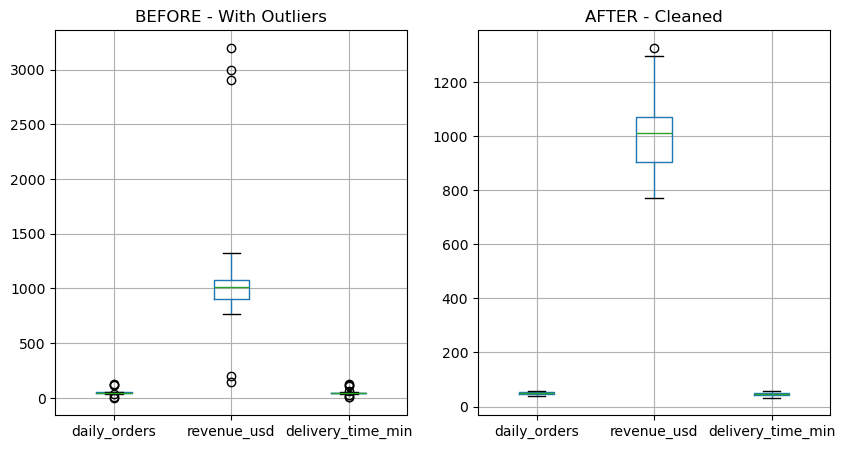

In [13]:
# Step 5: Compare Before vs After

print("\nBEFORE vs AFTER:")
print("Daily Orders:")
print(f"  Before: mean = {df['daily_orders'].mean():.1f}")
print(f"  After:  mean = {clean_df['daily_orders'].mean():.1f}")

# Simple before/after boxplot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
df.boxplot(ax=ax1)
ax1.set_title('BEFORE - With Outliers')
clean_df.boxplot(ax=ax2)
ax2.set_title('AFTER - Cleaned')
plt.show()

In [15]:
print("OUTLIER BOUNDARIES:")
for col in df.columns:
    lower, upper = find_outliers_simple(clean_df[col])
    outliers = clean_df[(clean_df[col] < lower) | (clean_df[col] > upper)]
    print(f"{col}: {len(outliers)} outliers")

OUTLIER BOUNDARIES:
daily_orders: 0 outliers
revenue_usd: 1 outliers
delivery_time_min: 0 outliers


In [16]:
c_df = clean_df.copy()
for col in clean_df.columns:
    lower, upper = find_outliers_simple(clean_df[col])
    c_df = c_df[(c_df[col] >= lower) & (c_df[col] <= upper)]

print(f"Original: {len(clean_df)} rows")
print(f"Clean: {len(c_df)} rows")
print(f"Removed: {len(clean_df) - len(c_df)} rows")

Original: 92 rows
Clean: 91 rows
Removed: 1 rows



BEFORE vs AFTER:
Daily Orders:
  Before: mean = 49.7
  After:  mean = 49.8


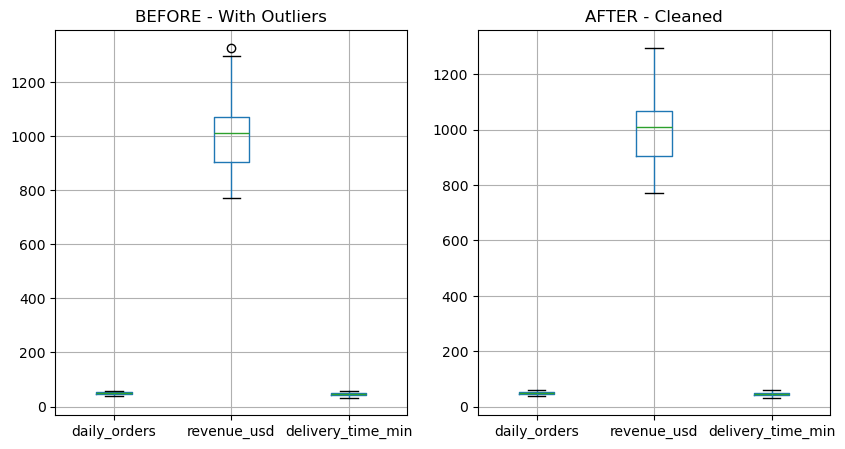

In [18]:
print("\nBEFORE vs AFTER:")
print("Daily Orders:")
print(f"  Before: mean = {clean_df['daily_orders'].mean():.1f}")
print(f"  After:  mean = {c_df['daily_orders'].mean():.1f}")

# Simple before/after boxplot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
clean_df.boxplot(ax=ax1)
ax1.set_title('BEFORE - With Outliers')
c_df.boxplot(ax=ax2)
ax2.set_title('AFTER - Cleaned')
plt.show()

In [19]:
import pandas as pd
import numpy as np

df = pd.read_csv('outliers_100x3_raw.csv')
print("Original data shape:", df.shape)

Original data shape: (100, 3)
